# Python for Financial Analysis and Algorithmic Trading

## Portfolio Management

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Construct a portfolio

In [2]:
import pandas_datareader as web

/Users/yuangchen/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start_date = '2018-01-01'
end_date = '2019-01-01'

In [4]:
aapl = web.DataReader('AAPL', 'yahoo', start_date, end_date)
tsla = web.DataReader('TSLA', 'yahoo', start_date, end_date)
amzn = web.DataReader('AMZN', 'yahoo', start_date, end_date)
googl = web.DataReader('GOOGL', 'yahoo', start_date, end_date)

In [5]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040


- Calculate **Normed Return**

In [6]:
aapl.iloc[0]['Adj Close']

166.3537139892578

In [7]:
for stock_df in (aapl, tsla, amzn, googl):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

- **Allocations**: Let's pretend we have the following allocations for our portfolio:
    - AAPL: 30%
    - GOOGL: 30%
    - AMZN: 25%
    - TSLA: 15%

In [8]:
for stock_df, allo in zip([aapl, googl, amzn, tsla], [0.3, 0.3, 0.25, 0.15]):
    stock_df['Normed Return with Allocation'] = stock_df['Normed Return']*allo

In [9]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Normed Return with Allocation
Date,,,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714,1.000000,0.300000
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722,0.999826,0.299948
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290,1.004470,0.301341
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741,1.015906,0.304772
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040,1.012133,0.303640


- **Investment**
    - Let's assume a total investment of \\$1000000.

In [10]:
for stock_df in (aapl, googl, amzn, tsla):
    stock_df['Position Values'] = stock_df['Normed Return with Allocation'] * 1000000

In [11]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Normed Return with Allocation,Position Values
Date,,,,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714,1.000000,0.300000,300000.000000
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722,0.999826,0.299948,299947.716768
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290,1.004470,0.301341,301340.954822
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741,1.015906,0.304772,304771.808001
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040,1.012133,0.303640,303639.821001


- Total Portfolio Value

In [12]:
portfolio_val = pd.concat([aapl['Position Values'], googl['Position Values'], 
                           amzn['Position Values'], tsla['Position Values']], axis=1)
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2018-01-02,300000.000000,300000.000000,250000.000000,150000.000000
2018-01-03,299947.716768,305118.306555,253193.821179,148465.042839
2018-01-04,301340.954822,306303.533227,254327.120017,147234.266519
2018-01-05,304771.808001,310365.188400,258437.692819,148151.493360
2018-01-08,303639.821001,311460.944687,262165.579952,157431.443988


In [13]:
portfolio_val.columns = ['AAPL Pos', 'GOOGL Pos', 'AMZN Pos', 'TSLA Pos']
portfolio_val.head()

,AAPL Pos,GOOGL Pos,AMZN Pos,TSLA Pos
Date,,,,
2018-01-02,300000.000000,300000.000000,250000.000000,150000.000000
2018-01-03,299947.716768,305118.306555,253193.821179,148465.042839
2018-01-04,301340.954822,306303.533227,254327.120017,147234.266519
2018-01-05,304771.808001,310365.188400,258437.692819,148151.493360
2018-01-08,303639.821001,311460.944687,262165.579952,157431.443988


In [14]:
portfolio_val['Total Value'] = portfolio_val.sum(axis=1)

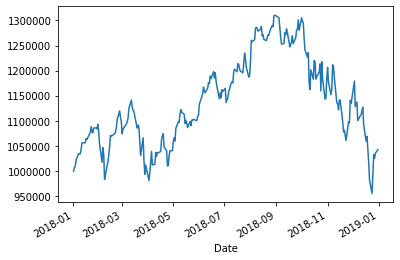

In [15]:
portfolio_val['Total Value'].plot()

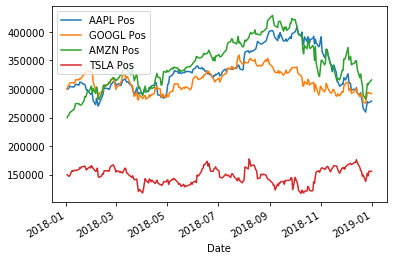

In [17]:
portfolio_val.drop('Total Value', axis=1).plot()

- **Portfolio Statistics**

In [18]:
portfolio_val['Daily Return'] = portfolio_val['Total Value'].pct_change(1)
portfolio_val.head()

,AAPL Pos,GOOGL Pos,AMZN Pos,TSLA Pos,Total Value,Daily Return
Date,,,,,,
2018-01-02,300000.000000,300000.000000,250000.000000,150000.000000,1.000000e+06,NaN
2018-01-03,299947.716768,305118.306555,253193.821179,148465.042839,1.006725e+06,0.006725
2018-01-04,301340.954822,306303.533227,254327.120017,147234.266519,1.009206e+06,0.002464
2018-01-05,304771.808001,310365.188400,258437.692819,148151.493360,1.021726e+06,0.012406
2018-01-08,303639.821001,311460.944687,262165.579952,157431.443988,1.034698e+06,0.012696


In [19]:
portfolio_val.tail()

,AAPL Pos,GOOGL Pos,AMZN Pos,TSLA Pos,Total Value,Daily Return
Date,,,,,,
2018-12-24,259551.380520,275249.956323,282579.614532,138235.117980,9.556161e+05,-0.027660
2018-12-26,277829.350651,292910.990503,309269.899398,152601.939403,1.032612e+06,0.080572
2018-12-27,276026.294613,294322.657095,307322.899438,147940.913216,1.025613e+06,-0.006778
2018-12-28,276167.734513,292583.956115,310766.942118,156242.783697,1.035761e+06,0.009895
2018-12-31,278836.958595,292103.129575,315802.633781,155742.047107,1.042485e+06,0.006491


In [21]:
print("Portfolio Cumulative Return: {}".format(portfolio_val['Total Value'][-1] / portfolio_val['Total Value'][0] - 1))

Portfolio Cumulative Return: 0.0424847690572383


In [22]:
print("Portfolio Average Daily Return: {}".format(portfolio_val['Daily Return'].mean()))

Portfolio Average Daily Return: 0.0003200523066843868


In [23]:
print("Portfolio Std Daily Return: {}".format(portfolio_val['Daily Return'].std()))

Portfolio Std Daily Return: 0.01756321890614897


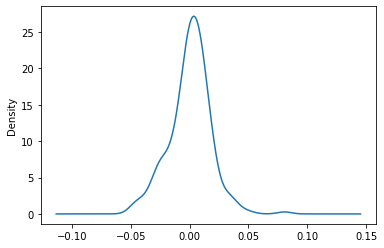

In [24]:
portfolio_val['Daily Return'].plot(kind='kde')

In [29]:
print("Portfolio reached maximum value on {}".format(portfolio_val.index[np.argmax(portfolio_val['Total Value'])]))

Portfolio reached maximum value on 2018-08-30 00:00:00


- Sharpe Ratio
    - Sharpe Ratio = $(R_p - R_f)/\sigma_p$
        - Here, assume $R_f \approx 0$ in the US, and we use the mean of daily returns as $E(R_p)$.

In [30]:
sharpe_ratio = (portfolio_val['Daily Return'].mean() - 0) / portfolio_val['Daily Return'].std()

In [31]:
print("Sharpe Ratio = {}".format(sharpe_ratio))

Sharpe Ratio = 0.018222872947984203


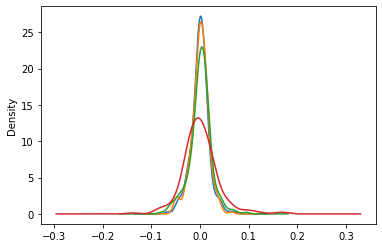

In [34]:
aapl['Adj Close'].pct_change(1).plot(kind='kde')
googl['Adj Close'].pct_change(1).plot(kind='kde')
amzn['Adj Close'].pct_change(1).plot(kind='kde')
tsla['Adj Close'].pct_change(1).plot(kind='kde')

## Portfolio Optimization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader as web

/Users/yuangchen/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Create the portfolio

In [3]:
start_date = '2011-01-01'
end_date = '2019-01-01'

In [4]:
aapl = web.DataReader('AAPL', 'yahoo', start_date, end_date)
tsla = web.DataReader('TSLA', 'yahoo', start_date, end_date)
amzn = web.DataReader('AMZN', 'yahoo', start_date, end_date)
googl = web.DataReader('GOOGL', 'yahoo', start_date, end_date)

In [5]:
stocks = pd.concat([aapl['Adj Close'], googl['Adj Close'], amzn['Adj Close'], tsla['Adj Close']], axis=1)
stocks.columns = ['AAPL', 'GOOGL', 'AMZN', 'TSLA']
stocks.head()

,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2011-01-03,40.758278,302.477478,184.220001,26.620001
2011-01-04,40.970993,301.361359,185.009995,26.670000
2011-01-05,41.306126,304.839844,187.419998,26.830000
2011-01-06,41.272743,307.057068,185.860001,27.879999
2011-01-07,41.568314,308.528534,185.490005,28.240000


In [6]:
mean_daily_return = stocks.pct_change(1).mean()
mean_daily_return

AAPL     0.000793
GOOGL    0.000729
AMZN     0.001241
TSLA     0.001749
dtype: float64

### Normed Returns

In [7]:
stocks_normed_returns = stocks/stocks.iloc[0]
stocks_normed_returns.head()

,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000
2011-01-04,1.005219,0.996310,1.004288,1.001878
2011-01-05,1.013441,1.007810,1.017371,1.007889
2011-01-06,1.012622,1.015140,1.008902,1.047333
2011-01-07,1.019874,1.020005,1.006894,1.060856


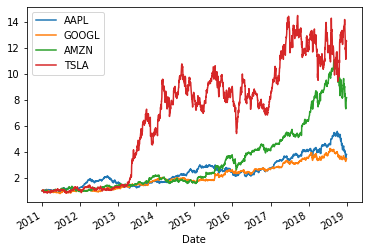

In [8]:
stocks_normed_returns.plot()

### Daily Returns and Log Returns

In [9]:
stocks_daily_returns = stocks.pct_change(1)
stocks_daily_returns.head()

,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.005219,-0.003690,0.004288,0.001878
2011-01-05,0.008180,0.011543,0.013026,0.005999
2011-01-06,-0.000808,0.007273,-0.008324,0.039135
2011-01-07,0.007161,0.004792,-0.001991,0.012913


In [10]:
stocks/stocks.shift(1).head()

,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,1.005219,0.996310,1.004288,1.001878
2011-01-05,1.008180,1.011543,1.013026,1.005999
2011-01-06,0.999192,1.007273,0.991676,1.039135
2011-01-07,1.007161,1.004792,0.998009,1.012913
...,...,...,...,...
2018-12-24,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN


In [11]:
stocks_log_returns = np.log(stocks/stocks.shift(1))
stocks_log_returns.head()

,AAPL,GOOGL,AMZN,TSLA
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.005205,-0.003697,0.004279,0.001876
2011-01-05,0.008146,0.011476,0.012942,0.005981
2011-01-06,-0.000808,0.007247,-0.008358,0.038389
2011-01-07,0.007136,0.004781,-0.001993,0.012830


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe11c9c090>,
      dtype=object)

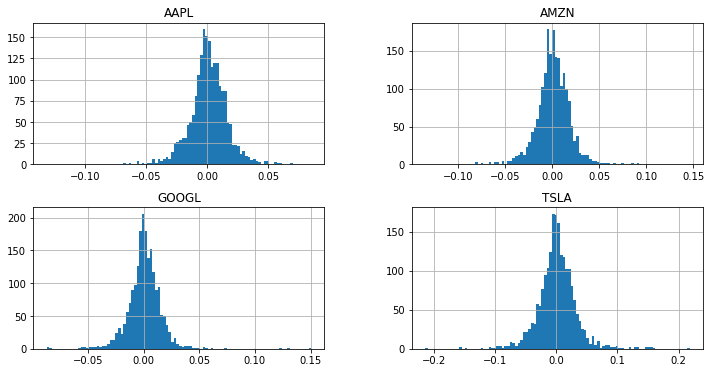

In [12]:
stocks_log_returns.hist(bins=100, figsize=(12,6))

In [13]:
stocks_log_returns.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,2011.0,0.000663,0.016117,-0.131884,-0.007009,0.000547,0.009388,0.085022
GOOGL,2011.0,0.000616,0.014991,-0.087493,-0.006401,0.000481,0.008367,0.150645
AMZN,2011.0,0.001043,0.019850,-0.135325,-0.008223,0.000966,0.011557,0.146225
TSLA,2011.0,0.001256,0.031315,-0.214772,-0.014433,0.000604,0.017325,0.218292


### A Single Run of Random Allocation

In [14]:
np.random.seed(1)

In [15]:
weights = np.random.rand(4)
weights = weights / np.sum(weights)
weights

array([2.89640161e-01, 5.00297106e-01, 7.94383512e-05, 2.09983296e-01])

In [16]:
port_daily_returns = np.sum(stocks_daily_returns*weights, axis=1)
port_daily_returns.head()

Date
2011-01-03    0.000000
2011-01-04    0.000060
2011-01-05    0.009405
2011-01-06    0.011622
2011-01-07    0.007183
dtype: float64

- The **Arithmetic Mean Return** of portfolio: $\sum_{t=1}^{n}\frac{R_t}{n}$

In [17]:
port_arith_return = np.mean(port_daily_returns)
port_arith_return

0.0009615523015038549

- The **Geometric Mean Return** of portfolio: $(\prod_{t=1}^{n}(HPR_t+1))^{\frac{1}{n}} - 1$

In [18]:
port_geo_return = np.prod(1+port_daily_returns)**(1/len(port_daily_returns))-1
port_geo_return

0.0008629191108910916

- The **Sample Variance** of portfolio (of n stocks): $\sigma^{2} = W \Sigma W$
    - $W$ is the $n \times 1$ vector of weights
    - $\Sigma$ is the $n \times n$ covariance matrix

In [19]:
cov_mat = stocks_daily_returns.cov()
cov_mat

,AAPL,GOOGL,AMZN,TSLA
AAPL,0.000259,0.000105,0.000117,0.000128
GOOGL,0.000105,0.000228,0.000165,0.000138
AMZN,0.000117,0.000165,0.000397,0.000187
TSLA,0.000128,0.000138,0.000187,0.000997


In [20]:
port_var = np.dot(weights.T, np.dot(cov_mat, weights))
port_var

0.00019780538829024106

In [21]:
port_std = np.sqrt(port_var)
port_std

0.014064330353423908

In [22]:
port_sharpe = (port_arith_return - 0)/port_std
print('Portfolio Sharpe Ratio = {}'.format(port_sharpe))

Portfolio Sharpe Ratio = 0.0683681538573764


### Simulating Thousands of Possible Allocations

In [34]:
np.random.seed(1)

In [35]:
n_simulation = 15000
all_weights = np.zeros((n_simulation, len(stocks_daily_returns.columns)))
return_arr = np.zeros(n_simulation)
std_arr = np.zeros(n_simulation)
sharpe_arr = np.zeros(n_simulation)

In [36]:
for indx in range(n_simulation):
    weights_temp = np.random.rand(4)
    weights_temp = weights_temp / np.sum(weights_temp)
    all_weights[indx, ] = weights_temp
    
    port_daily_returns_temp = np.sum(stocks_daily_returns*weights_temp, axis=1)
    port_arith_return_temp = np.mean(port_daily_returns_temp)
    return_arr[indx] = port_arith_return_temp
    
    port_var_temp = np.dot(weights_temp.T, np.dot(cov_mat, weights_temp))
    port_std_temp = np.sqrt(port_var_temp)
    std_arr[indx] = port_std_temp
    
    port_sharpe_temp = port_arith_return_temp/port_std_temp
    sharpe_arr[indx] = port_sharpe_temp

In [37]:
all_weights[np.argmax(sharpe_arr), ]

array([0.30320951, 0.06768139, 0.39903611, 0.23007299])

In [38]:
np.max(sharpe_arr)

0.07680097048909192

In [39]:
max_sr_return = return_arr[np.argmax(sharpe_arr)]
max_sr_std = std_arr[np.argmax(sharpe_arr)]
max_sr_return, max_sr_std

(0.001187055305133124, 0.015456253971448475)

- Plot the simulated portfolios

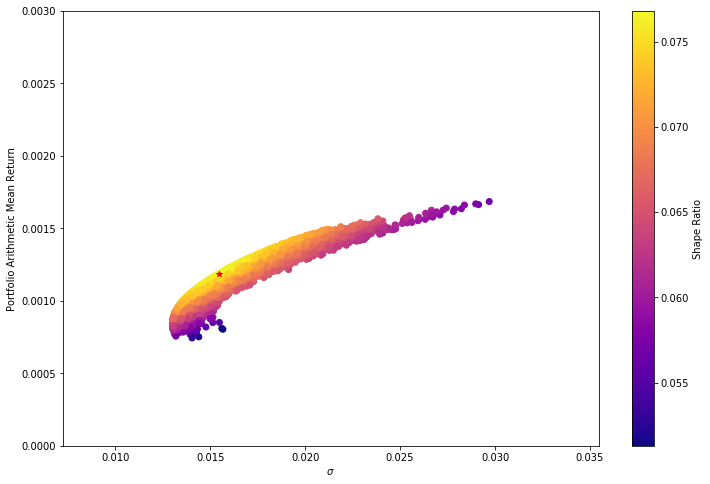

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(std_arr, return_arr, c=sharpe_arr, cmap='plasma')
plt.ylim([0, 0.003])
plt.colorbar(label='Shape Ratio')
plt.xlabel("$\sigma$")
plt.ylabel("Portfolio Arithmetic Mean Return")

plt.plot(max_sr_std, max_sr_return, 'r*')

### Mathematical Optimization

In [50]:
from scipy.optimize import minimize

In [51]:
def get_return_std_sharpe(weights_temp):
    port_daily_returns_temp = np.sum(stocks_daily_returns*weights_temp, axis=1)
    port_arith_return_temp = np.mean(port_daily_returns_temp)
    
    port_var_temp = np.dot(weights_temp.T, np.dot(cov_mat, weights_temp))
    port_std_temp = np.sqrt(port_var_temp)
    
    port_sharpe_temp = port_arith_return_temp/port_std_temp

    return np.array([port_arith_return_temp, port_std_temp, port_sharpe_temp])

- Since we want to maximize the Sharpe Ratio, we need to minimize negative Sharpe Ratio.

In [52]:
def neg_sharpe(weights_temp):
    return get_return_std_sharpe(weights_temp)[2]*(-1)

- Constraint for the optimization problem
    - By convention of minimize function, it should be a function that returns zero for conditions.

In [53]:
def check_sum(weights_temp):
    return np.sum(weights_temp)-1

In [54]:
cons = ({'type':'eq', 'fun':check_sum})

- Bounds for outputs

In [55]:
bounds = ((0,1), (0,1), (0,1), (0,1))

- Initial guess

In [56]:
init_guess = (0.25, 0.25, 0.25, 0.25)

- Now, use the `minimize()` function to find the optimal weights.
    - We use the Sequential Least SQuares Programming (SLSQP) method.

In [57]:
optimize_results = minimize(fun=neg_sharpe, x0=init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [58]:
optimize_results

     fun: -0.07681150759065393
     jac: array([-1.58268958e-05, -6.85276464e-05, -8.68774951e-05,  1.95012428e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.28771642, 0.07957948, 0.40220057, 0.23050353])

In [59]:
get_return_std_sharpe(optimize_results.x)

array([0.00118813, 0.01546813, 0.07681151])

- Let's plot this optimal allocation together with other simulated portfolios.

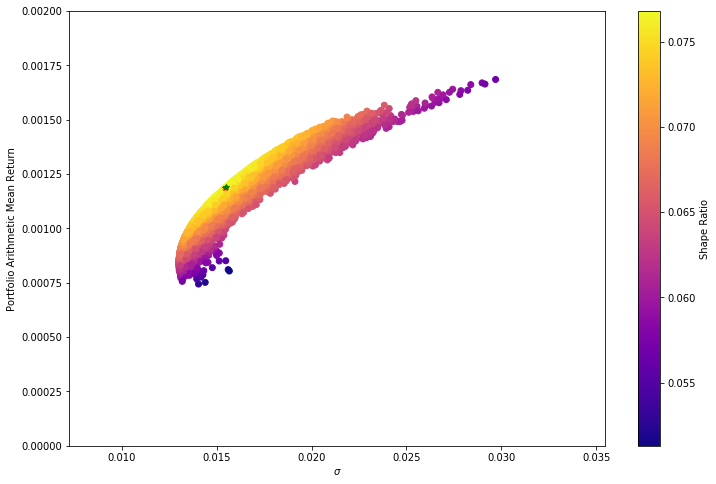

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(std_arr, return_arr, c=sharpe_arr, cmap='plasma')
plt.ylim([0, 0.002])
plt.colorbar(label='Shape Ratio')
plt.xlabel("$\sigma$")
plt.ylabel("Portfolio Arithmetic Mean Return")

plt.plot(max_sr_std, max_sr_return, 'r*')

plt.plot(get_return_std_sharpe(optimize_results.x)[1],
         get_return_std_sharpe(optimize_results.x)[0], 'g*')

### Efficient Frontier
- Here, we trace out the Efficient Frontier by optimizing for the smallest volatility, given each level of return.

- First, we need to define the 'Target', i.e. the item that we want to minimize.
    - In the section above, it's negative Sharpe Ratio.
    - Here, it's standard deviation.

In [69]:
def get_std(weights_temp):
    return get_return_std_sharpe(weights_temp)[1]

- Now, for each given return level, we optimize for the smallest standard deviation.
    - Note, here we need an additional constraint that requires the return equal to the return given.
    - Also note that we want to record the optimized target, which is returned in `result['fun']`.

In [70]:
all_return_levels = np.linspace(np.min(return_arr), np.max(return_arr), 100)

In [73]:
efficient_stds = []

for return_level in all_return_levels:
    cons = ({'type':'eq', 'fun': check_sum},
           {'type':'eq', 'fun': lambda w: get_return_std_sharpe(w)[0] - return_level})
    
    result = minimize(get_std, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    efficient_stds.append(result['fun'])

- Plot the Efficient Frontier

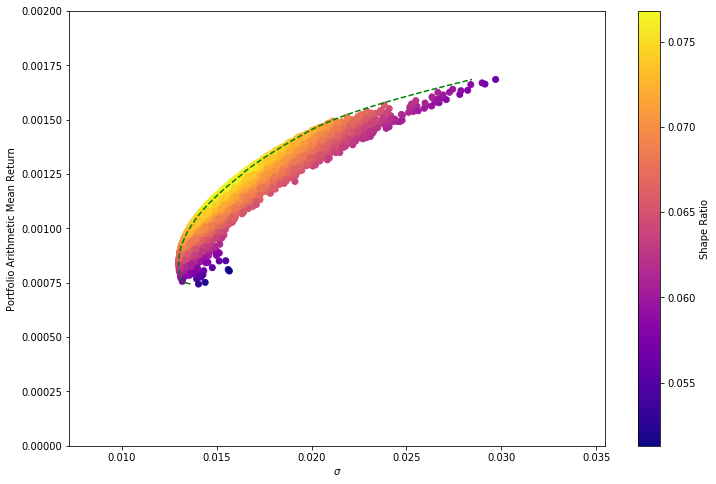

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(std_arr, return_arr, c=sharpe_arr, cmap='plasma')
plt.ylim([0, 0.002])
plt.colorbar(label='Shape Ratio')
plt.xlabel("$\sigma$")
plt.ylabel("Portfolio Arithmetic Mean Return")

plt.plot(efficient_stds, all_return_levels, 'g--')

## Capital Asset Pricing Model (CAPM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader as web

/Users/yuangchen/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
spy = web.DataReader('SPY', 'yahoo', "2018-01-01", "2019-01-01")
aapl = web.DataReader('AAPL', 'yahoo', "2018-01-01", "2019-01-01")

In [5]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,268.809998,267.399994,267.839996,268.769989,86655700.0,257.345001
2018-01-03,270.640015,268.959991,268.959991,270.470001,90070400.0,258.972717
2018-01-04,272.160004,270.540009,271.200012,271.609985,80636400.0,260.064240
2018-01-05,273.559998,271.950012,272.510010,273.420013,83524000.0,261.797302
2018-01-08,274.100006,272.980011,273.309998,273.920013,57319200.0,262.276093


In [6]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,166.353714
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,166.324722
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,167.097290
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,168.999741
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,168.372040


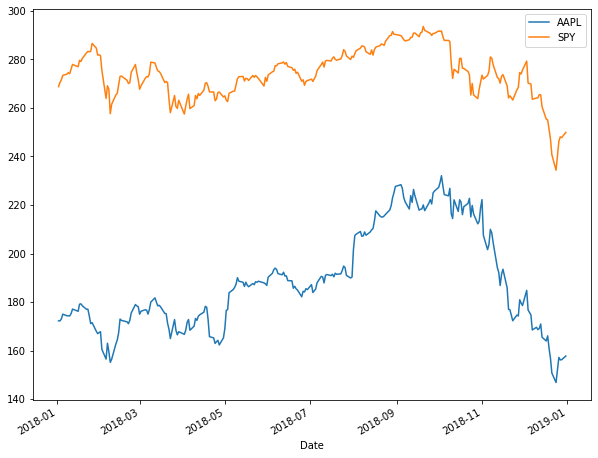

In [7]:
aapl['Close'].plot(label='AAPL', figsize=(10, 8))
spy['Close'].plot(label='SPY')
plt.legend()

### Compare Cumulative Return

In [8]:
spy['Cumulative Return'] = spy['Close']/spy['Close'].iloc[0]
aapl['Cumulative Return'] = aapl['Close']/aapl['Close'].iloc[0]

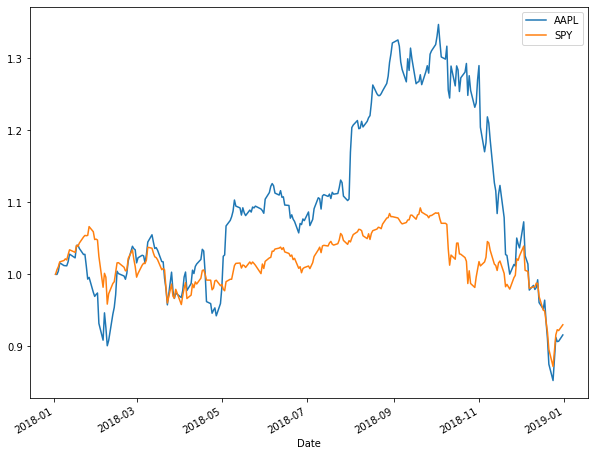

In [9]:
aapl['Cumulative Return'].plot(label='AAPL', figsize=(10, 8))
spy['Cumulative Return'].plot(label='SPY')
plt.legend()

### Compare Daily Returns

In [10]:
spy['Daily Return'] = spy['Close'].pct_change(1)
aapl['Daily Return'] = aapl['Close'].pct_change(1)

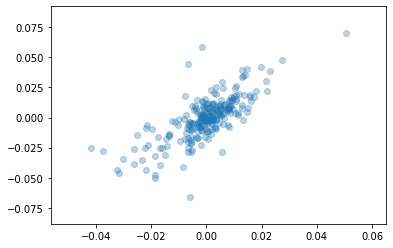

In [11]:
plt.scatter(spy['Daily Return'], aapl['Daily Return'], alpha=0.3)

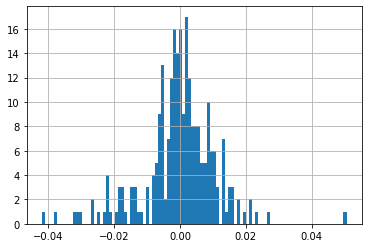

In [12]:
spy['Daily Return'].hist(bins=100)

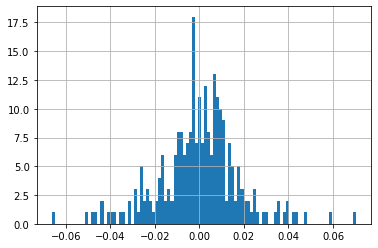

In [13]:
aapl['Daily Return'].hist(bins=100)

### The CAPM
- $E(R_i) = R_f + \beta_i \times (E(R_m) - R_f)$
    - Here, we use SPY to represent the market.

In [14]:
from scipy import stats

In [18]:
beta,alpha,r_value,p_value,std_err = stats.linregress(x=spy['Daily Return'].iloc[1:], 
                                                      y=aapl['Daily Return'].iloc[1:])

In [19]:
beta

1.2534309538828474

In [20]:
alpha

0.000102751261040348

In [21]:
r_value

0.7478342928339387

### What if a stock if completely related to the SPY index?

In [22]:
noise = np.random.normal(0, 0.001, size=len(spy['Daily Return'].iloc[1:]))

In [23]:
my_stock_return = spy['Daily Return'].iloc[1:] + noise

In [24]:
beta,alpha,r_value,p_value,std_err = stats.linregress(my_stock_return, 
                                                      y=aapl['Daily Return'].iloc[1:])

In [25]:
beta

1.2388107647883577

In [26]:
alpha

4.175271367229123e-05